In [9]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
#Loading data from csv file to a pandas dataframe
#DATA COLLECTION STEP ONE OKAY 

insurance_dataset=pd.read_csv("C:/Users/Prabhleen Kaur/OneDrive/Documents/Ml_pROJECT/archive/insurance.csv")

In [11]:
#DATA ANALASIS DONE STEP OKAY

In [12]:
#print first five rows of the dataframe)US Dataset charges are in us dollars)
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [14]:
#number of rows and columns 
insurance_dataset.shape

(1338, 7)

In [15]:
insurance_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
insurance_dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
insurance_dataset.duplicated().any()

True

In [19]:
insurance_dataset.drop_duplicates(inplace=True)

In [20]:
insurance_dataset.shape

(1337, 7)

In [21]:
insurance_dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [22]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
#3 categorical features sex smoker  region   
#charges is target variable
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
Numerical_columns = insurance_dataset.select_dtypes(include="number").columns.to_list()
Categorical_columns = insurance_dataset.select_dtypes(exclude="number").columns.to_list()
print(f"Numerical columns in the  data : {Numerical_columns}")
print(f"Categorical columns in the data :{Categorical_columns}")

Numerical columns in the  data : ['age', 'bmi', 'children', 'charges']
Categorical columns in the data :['sex', 'smoker', 'region']


In [25]:
#statistical measures of the dataset(only for numerical values)
insurance_dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
insurance_dataset.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [27]:
#DATA VISULAIZATIONS HISTOGRAMS NUMERIC COLUMN

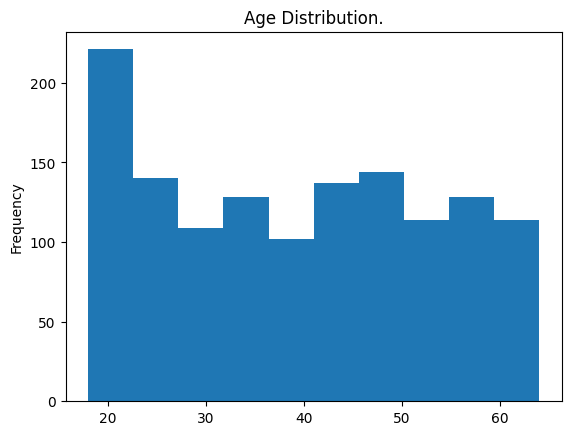

In [28]:
insurance_dataset['age'].plot(kind='hist')
plt.title("Age Distribution.")
plt.show()

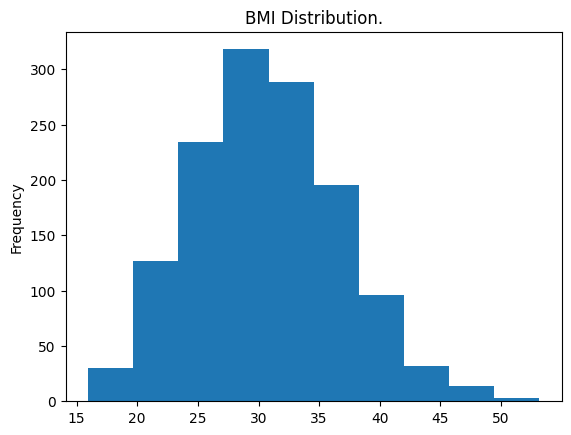

In [29]:
insurance_dataset['bmi'].plot(kind='hist')
plt.title("BMI Distribution.")
plt.show()

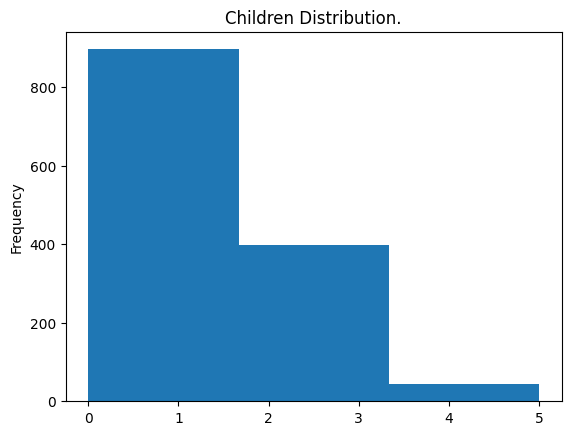

In [30]:
insurance_dataset['children'].plot(kind='hist',bins=3)
plt.title("Children Distribution.")
plt.show()

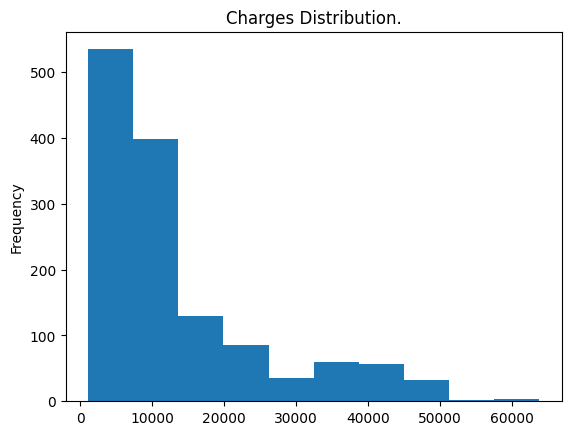

In [31]:
insurance_dataset['charges'].plot(kind='hist')
plt.title("Charges Distribution.")
plt.show()

<Axes: xlabel='children'>

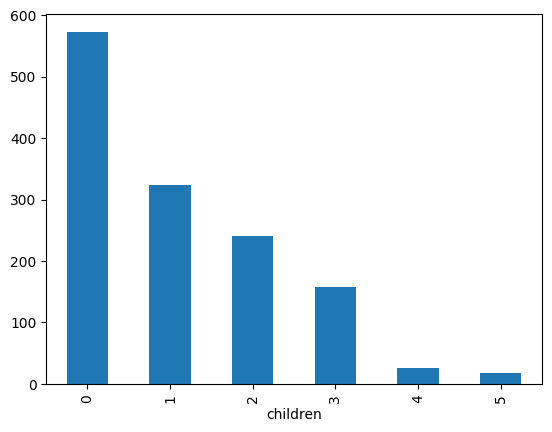

In [32]:

#BAR GRAPHS Categoriacl column
insurance_dataset["children"].value_counts().plot(kind='bar')


<Axes: xlabel='sex'>

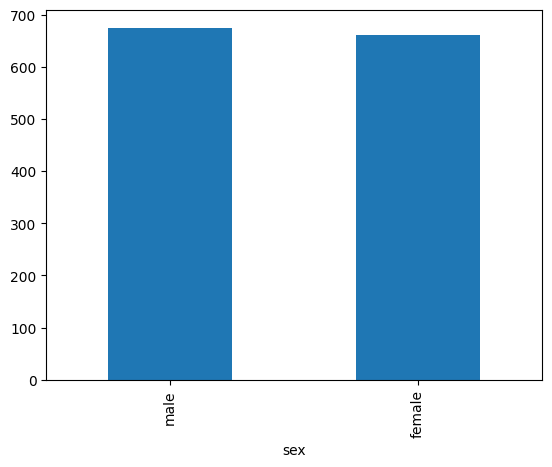

In [33]:
insurance_dataset["sex"].value_counts().plot(kind='bar')


<Axes: xlabel='region'>

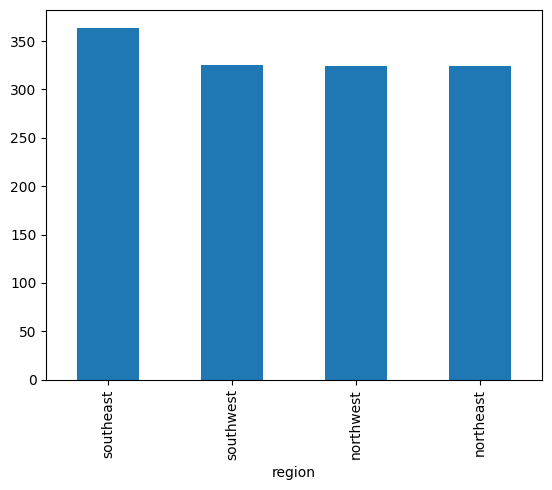

In [34]:
insurance_dataset["region"].value_counts().plot(kind='bar')


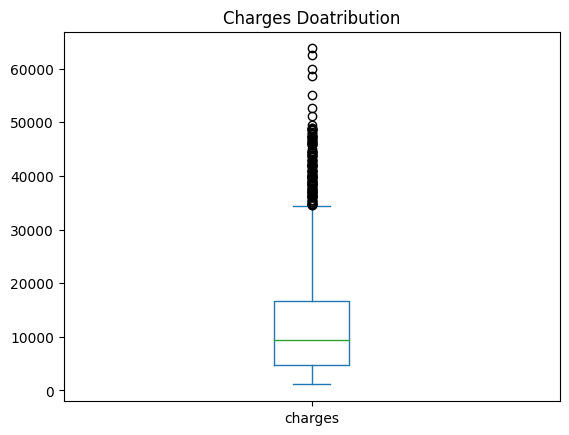

In [35]:
#BOX PLOT NUMNERIC COLUMNS
insurance_dataset["charges"].plot(kind='box')
plt.title("Charges Doatribution")
plt.show()


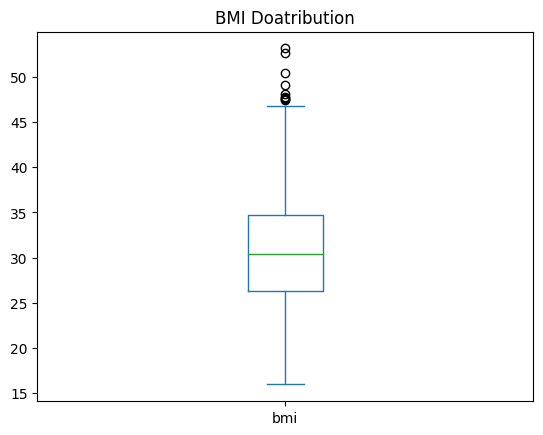

In [36]:
insurance_dataset["bmi"].plot(kind='box')
plt.title("BMI Doatribution")
plt.show()


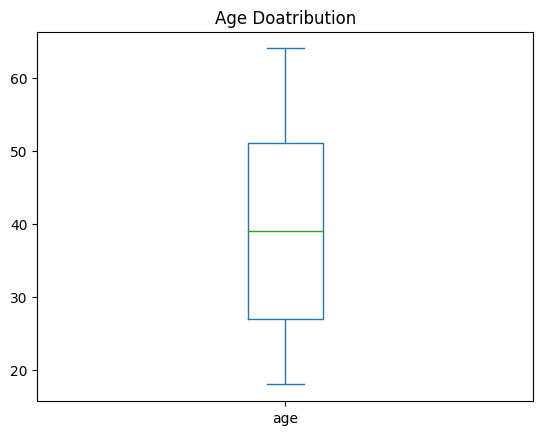

In [37]:
insurance_dataset["age"].plot(kind='box')
plt.title("Age Doatribution")
plt.show()


In [38]:
#pie chart for region
region_count=insurance_dataset["region"].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

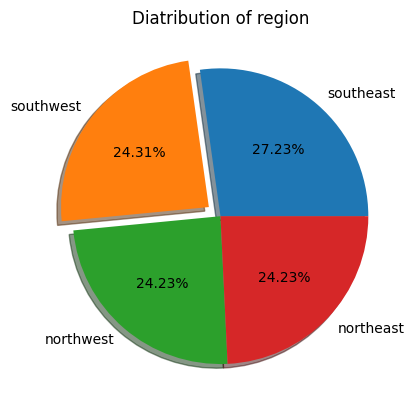

In [39]:
plt.pie(labels=region_count.index,
        x=region_count.values,
        shadow=True,
        autopct ='%.2f%%',
        explode=(0,0.1,0,0))
plt.title("Diatribution of region")
plt.show()

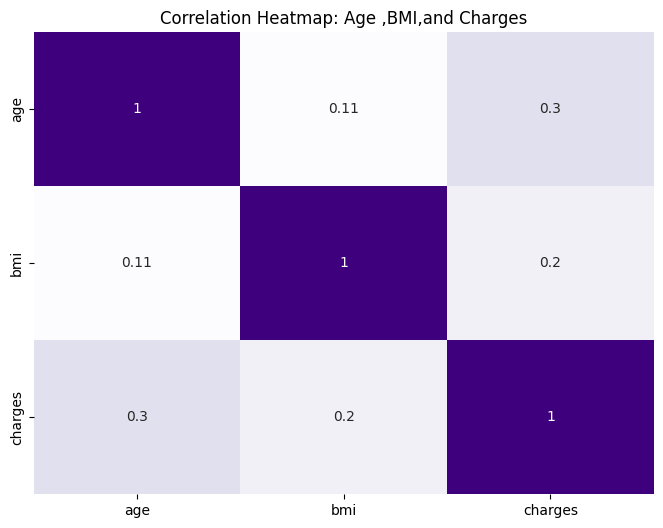

In [40]:
corr_data=insurance_dataset[["age","bmi","charges"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(round(corr_data,2),annot=True,cmap="Purples",cbar=False)
plt.title("Correlation Heatmap: Age ,BMI,and Charges")
plt.show()

In [41]:
#Data Preprocessing
#computers donot understand text values so convert to labels numerical value we will give
#Encoding categorical Features


In [42]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [43]:
insurance_dataset['sex']=l.fit_transform(insurance_dataset['sex'])
insurance_dataset['smoker']=l.fit_transform(insurance_dataset['smoker'])
insurance_dataset['region']=l.fit_transform(insurance_dataset['region'])


In [44]:
X=insurance_dataset.drop(columns='charges',axis=1)# 1 represnets column
Y=insurance_dataset['charges']

In [45]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1337 rows x 6 columns]


In [46]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [47]:
#Splittimg daat into Training Data & Testing Data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#random state  2 both of the data will be split in same manner

In [48]:
#check shape of splitting data
print(f"The shape of X train :{X_train.shape}")
print(f"The shape of Y train :{Y_train.shape}")
print(f"The shape of X test : {X_test.shape}")
print(f"The shape of Y test:  {Y_test.shape}")


The shape of X train :(1069, 6)
The shape of Y train :(1069,)
The shape of X test : (268, 6)
The shape of Y test:  (268,)


In [49]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1337 rows x 6 columns]


In [50]:
from sklearn.preprocessing import StandardScaler
std_scaler =StandardScaler()

In [51]:
X['age'] =std_scaler.fit_transform(np.array(X['age']).reshape(-1,1))
X['bmi'] =std_scaler.fit_transform(np.array(X['bmi']).reshape(-1,1))
X['children'] =std_scaler.fit_transform(np.array(X['children']).reshape(-1,1))


In [52]:
print(X)

           age  sex       bmi  children  smoker  region
0    -1.440418    0 -0.453160 -0.909234       1       3
1    -1.511647    1  0.509422 -0.079442       0       2
2    -0.799350    1  0.383155  1.580143       0       2
3    -0.443201    1 -1.305052 -0.909234       0       1
4    -0.514431    1 -0.292456 -0.909234       0       1
...        ...  ...       ...       ...     ...     ...
1333  0.767704    1  0.050269  1.580143       0       1
1334 -1.511647    0  0.206053 -0.909234       0       0
1335 -1.511647    0  1.014490 -0.909234       0       2
1336 -1.297958    0 -0.797524 -0.909234       0       3
1337  1.551231    0 -0.261299 -0.909234       1       1

[1337 rows x 6 columns]


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
linear_reg_model=LinearRegression()

In [55]:
linear_reg_model.fit(X_train,Y_train)

LinearRegression()

In [58]:
from sklearn.linear_model import LinearRegression
linear_reg_model=LinearRegression()
linear_reg_model.fit(X_train,Y_train)
Y_pred = linear_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.10624124034163307
Root Mean Squared Error: 0.32594668328061427
Mean Absolute Error: 0.2675036960404937


In [59]:
#LOGISTIC REGRESSION
#import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Convert target variable to binary labels
Y = np.where(Y > np.median(Y), 1, 0)  # Binarize labels

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)



Accuracy: 0.8992537313432836
Precision: 0.8758620689655172
Recall: 0.9338235294117647
F1 Score: 0.9039145907473309


In [60]:
#KNN 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)


Mean Squared Error: 0.09880597014925374
Root Mean Squared Error: 0.314334169554081
Mean Absolute Error: 0.19999999999999998


In [61]:
#RANDOM FOREST
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)



print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)


Mean Squared Error: 0.05854925373134328
Root Mean Squared Error: 0.24196953058462398
Mean Absolute Error: 0.11813432835820896


In [62]:
#navye bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB



# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)


Mean Squared Error: 0.2835820895522388
Root Mean Squared Error: 0.5325242619376499
Mean Absolute Error: 0.2835820895522388


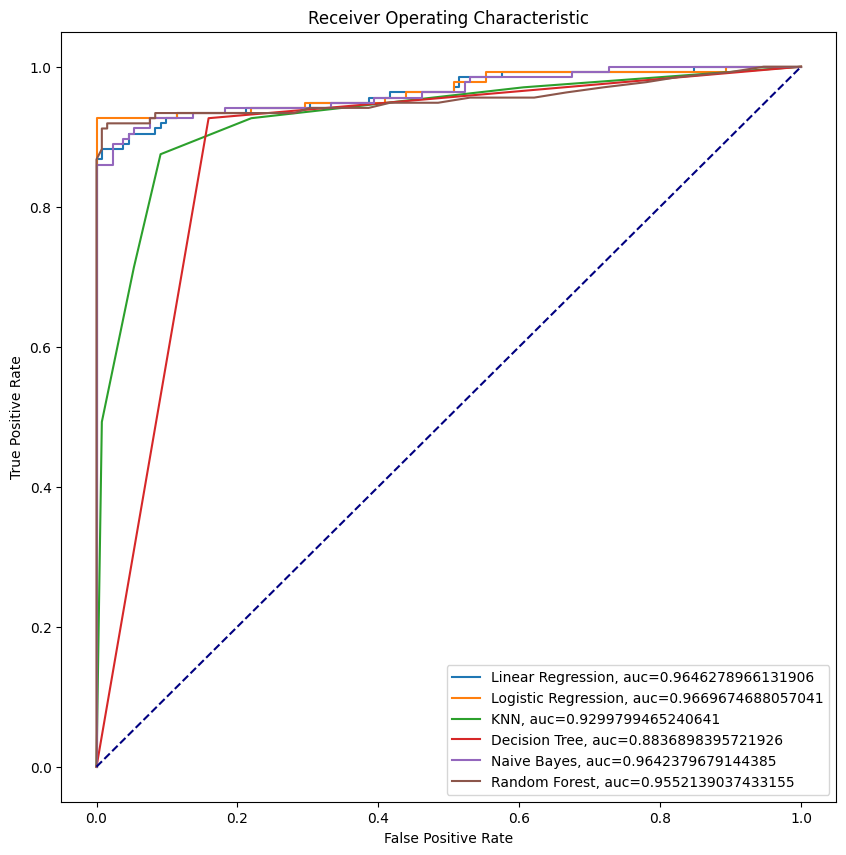

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

classifiers = [LinearRegression(), LogisticRegression(random_state=42), KNeighborsClassifier(), DecisionTreeClassifier(random_state=42), GaussianNB(), RandomForestClassifier(random_state=42)]
classifiers_names = ['Linear Regression', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

plt.figure(figsize=(10, 10))

for clf, name in zip(classifiers, classifiers_names):
    clf.fit(X_train, Y_train)
    if name == 'Linear Regression':
        Y_pred_proba = clf.predict(X_test)
    else:
        Y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(Y_test,  Y_pred_proba)
    auc = roc_auc_score(Y_test, Y_pred_proba)
    plt.plot(fpr,tpr,label=f"{name}, auc={auc}")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc=4)
plt.show()


In [68]:
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k)
for train_index, test_index in kf.split(insurance_dataset):
    train_data, test_data = insurance_dataset.iloc[train_index], insurance_dataset.iloc[test_index]

    
    X_train, y_train = train_data.drop(columns=['charges']), train_data['charges']
    X_test, y_test = test_data.drop(columns=['charges']), test_data['charges']
    from sklearn.linear_model import LinearRegression
    linear_reg_model=LinearRegression()
    linear_reg_model.fit(X_train,y_train)
    Y_pred = linear_reg_model.predict(X_test)
    from sklearn.metrics import mean_squared_error
    import numpy as np
    rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)


    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    

Mean Squared Error: 37103517.90168743
Root Mean Squared Error: 6091.265706048902
Mean Absolute Error: 4241.629762610341
Mean Squared Error: 37873347.30524997
Root Mean Squared Error: 6154.132538810808
Mean Absolute Error: 4245.924787668217
Mean Squared Error: 32714980.47965389
Root Mean Squared Error: 5719.701083068406
Mean Absolute Error: 4027.9510392232028
Mean Squared Error: 39538641.93068928
Root Mean Squared Error: 6287.9759804478645
Mean Absolute Error: 4244.848719982959
Mean Squared Error: 37191906.08454142
Root Mean Squared Error: 6098.516711835872
Mean Absolute Error: 4223.700124901633
